<h1>Neural Networks 2022/2023</h1>
<h2>Lab Session 1: Elements of Linear Algebra</h2>
<h3>Danilo Comminiello</h3>
<h3>September 29, 2022</h3>

### Table of Contents
1. [Scalars](#sca)<br>
2. [Vectors](#vec)<br>
    2.1. [Definition of vectors](#vdef)<br>
    2.2. [Manipulation of one-dimensional signals with vectors](#sv)<br>
3. [Matrices](#mat)<br>
    3.1. [Definition of matrices](#mdef)<br>
    3.2. [Manipulation of two-dimensional signals with matrices](#sm)<br>
4. [Tensors](#ten)<br>
    4.1. [Definition of tensors](#tdef)<br>
    4.2. [Manipulation of multidimensional signals with tensors](#st)<br>
5. [Basic Operations](#op)<br>
    5.1. [Elementwise operations](#ewo)<br>
    5.2. [Dot product](#dot)<br>
    5.3. [Norms](#nor)<br>
6. [References](#ref)<br>

### 1. Scalars <a name="sca" />

A **scalar** is a physical quantity, generally denoted by ordinary a lower-cased letter, which is described by any real number, e.g. $ x \in \mathbb{R}$.

In Python a scalar is represented by an `ndarray` with just one element.

You can perform simple arithmetic operations with scalars, i.e., additions, multiplications, divisions, and exponentiations, by using `NumPy`.

In [1]:
# Import Numpy and Matplotlib packages
import numpy as np
from matplotlib import pyplot as plt

In [2]:
a = np.array(2.421)
print(a)

2.421


In [3]:
b = np.array(3.0)
a + b, a * b, a / b, a ** b

(5.420999999999999, 7.263, 0.8069999999999999, 14.190064460999997)

### 2. Vectors <a name="vec" />

#### 2.1. Definition of vectors <a name="vdef" />

A **vector** is an ordered linear arrangement of a set of scalars, which are called the *elements*, or *entries*, of a vector. When a vector represents examples from a dataset, its values hold some real-world significance.

Vectors can be represented by $1$-dimensional `ndarray`s. In general `ndarray`s can have arbitrary lengths, subject to the memory limits of your machine.

In math notation, we will usually denote vectors as bold-faced, lower-cased letters (e.g., $\mathbf{x}$, $\mathbf{y}$, and $\mathbf{z})$, whose elements are scalars denoted by using a subscript. For example, we can refer to the $i^\mathrm{th}$ element of $\mathbf{x}$ by $x_i$.

In math, a vector $\mathbf{x}$ can be written as

$$\mathbf{x} =\begin{bmatrix}x_{1}  \\x_{2}  \\ \vdots  \\x_{N}\end{bmatrix},$$

where $x_1, \ldots, x_N$ are the $N$ elements of the vector.

In [4]:
# create a vector x = [1, 0.3, -2]
x = np.array([1, 0.3, -2])
print(x)

[ 1.   0.3 -2. ]


Let us define a vector $\mathbf{x} \in \mathbb{R}^N$, with $N = 9$.

In [5]:
N = np.array(9)
x = np.arange(0,N)
print(x)

[0 1 2 3 4 5 6 7 8]


We access any element by indexing into the `ndarray`.

In [6]:
x[4]

4

In [7]:
y = np.array([1,2,3,4,5,6,7,8,9])
print(y)

[1 2 3 4 5 6 7 8 9]


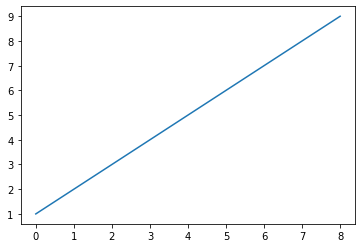

In [8]:
# We may plot the two vectors containing coordinates of points
plt.plot(x,y)
plt.show()

#### 2.2. Manipulation of one-dimensional signals with vectors <a name="sv" />

One of the most useful libraries that can be adopted to manipulate signals is **`SciPy`** (pronounced "Sigh Pie"). The [SciPy library](https://www.scipy.org/scipylib/index.html) provides many user-friendly and efficient numerical routines, such as routines for numerical integration, interpolation, optimization, linear algebra, and statistics. Each routine is managed by a task-specific submodule of `SciPy`.

One of the submodules is the `io`, which allows to load and save files.

Let us consider a one-dimensional signal, in particular an audio signal saved as a .wav file.

In [9]:
# import wavfile from the submodule io of scipy
from scipy.io import wavfile

If you use Jupiter and the file speech.wav is stored in your local folder Data, you can use the following instruction (changing the path according to the folder where the file is stored):

In [10]:
# fs, data = wavfile.read('Data/speech.wav')  % uncomment if you want to use this instruction

If you use Colab, you can also load a file that is stored in your Google Drive, as follows.

In [11]:
# import drive to use your Google Drive. Be sure to authorize the access to your drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [12]:
# check the path
fs, data = wavfile.read('gdrive/My Drive/Didattica/Classroom/Neural Networks 2022-2023/speech.wav')

The length of a vector is commonly called the *dimension* of the vector.

As with an ordinary Python array, we can access the length of an `ndarray`
by calling Python's built-in `len()` function.

The loaded signal is an audio file of $t = 10$ seconds sampled at $fs = 8$ kHz, thus it has a length of $t*fs$:

In [13]:
L = len(data)
print(L)

80000


In [14]:
# normalize input signal
x = data/max(abs(data))

In [15]:
t = np.arange(0,L)

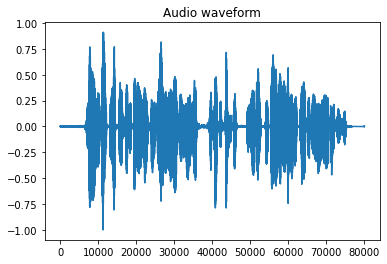

In [16]:
plt.title('Audio waveform')
plt.plot(t,x)
plt.show()

### 3. Matrices <a name="mat" />

#### 3.1. Definition of matrices <a name="mdef" />

A **matrix** consists of set of ordered elements arranged in a number *M* of rows and *N* columns. 
Matrices, which we will typically denote with bold-faced, capital letters
(e.g., $\mathbf{X}$, $\mathbf{Y}$, and $\mathbf{Z}$), are represented in code as `ndarray`s with $2$ axes.

In math notation, we use $\mathbf{A} \in \mathbb{R}^{M \times N}$ to express that the matrix $\mathbf{A}$ consists of $M$ rows and $N$ columns of real-valued scalars. Each element $a_{ij}$ fo $\mathbf{A}$ belongs to the $i^{\mathrm{th}}$ row and $j^{\mathrm{th}}$ column:

$$\mathbf{A}=\begin{bmatrix} a_{11} & a_{12} & \cdots & a_{1N} \\ a_{21} & a_{22} & \cdots & a_{2N} \\ \vdots & \vdots & \ddots & \vdots \\ a_{M1} & a_{M2} & \cdots & a_{MN} \\ \end{bmatrix}.$$

In Lab Session 1, we saw some basic commands to create 2-dimensional arrays. Let us create an $M \times N$ matrix with ordered numbers by reshaping values from a one-dimensional array:

In [17]:
A = np.arange(20).reshape(5, 4)
print(A)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]
 [16 17 18 19]]


If we want to flip the axes and computing the *transpose* of the matrix, i.e.,

$$
\mathbf{A}^\top =
\begin{bmatrix}
    a_{11} & a_{21} & \dots  & a_{M1} \\
    a_{12} & a_{22} & \dots  & a_{M2} \\
    \vdots & \vdots & \ddots  & \vdots \\
    a_{1N} & a_{2N} & \dots  & a_{MN}
\end{bmatrix},
$$

we use the `T` attribute:

In [18]:
A.T

array([[ 0,  4,  8, 12, 16],
       [ 1,  5,  9, 13, 17],
       [ 2,  6, 10, 14, 18],
       [ 3,  7, 11, 15, 19]])

As a special type of the square matrix, a *symmetric matrix* $\mathbf{A}$ is equal to its transpose:
$\mathbf{A} = \mathbf{A}^\top$.

In [19]:
B = np.array([[1, 2, 3], [2, 0, 4], [3, 4, 5]])

In [20]:
B == B.T

array([[ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True]])

#### 3.2. Manipulation of two-dimensional signals with matrices <a name="sm" />

Matrices are useful data structures. They can be used to store 2-dimensional signals, like b/w images or tabular data. Matrices also allow us to organize data that have different modalities of variation. For example, rows in our matrix might correspond to different *data points*, while columns might correspond to different *attributes*. Or they can be used to store multichannel signals, e.g., considering each row as a channel (or a sensor) and the columns as the values of the signal for each channel.

Thus, although the default orientation of a single vector is a column vector,
in a matrix that represents a tabular dataset, it is more conventional to treat each data point as a row vector in the matrix.

One method to load PNG images is to use the submodule `image` of Matplotlib.

In [21]:
# import image data into Numpy arrays
import matplotlib.image as mpimg

In [22]:
# load a black and white image from your local drive
# img = mpimg.imread('Data/buffalo.png') % uncomment to use this instruction

In [23]:
# load a black and white image from your Google Drive - check the path
img = mpimg.imread('gdrive/My Drive/Didattica/Classroom/Neural Networks 2022-2023/buffalo.png')

In [24]:
# matrix dimension
img.shape

(321, 481)

Matplotlib rescales the 8 bit data from each channel to floating point data between 0.0 and 1.0. Matplotlib plotting can handle float32 and uint8, but image reading/writing for any format other than PNG is limited to uint8 data.

In [25]:
img.dtype

dtype('float32')

Once we have our image stored in an `ndarray` we can render and visualize it. In Matplotlib, this is performed using the `imshow()` function.

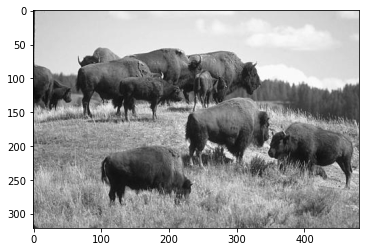

In [26]:
imgplot = plt.imshow(img, cmap='gray')

We may easily apply a mask to an image by selecting values of the image matrix.

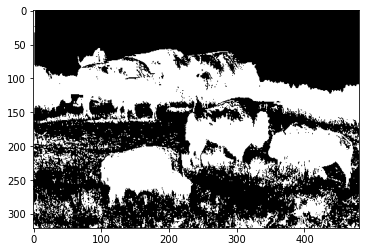

In [27]:
mask = img < 130/255
img[mask]=255
plt.imshow(img, cmap='gray')

We may apply *pseudocolors* to our image for enhancing contrast and visualizing data more easily. Pseudocolor is only relevant to single-channel, grayscale, luminosity images.

In the previous figure we have applied a gray colormap to visualize the image in gray scale. However, there are [plenty of others](https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html) to choose from.

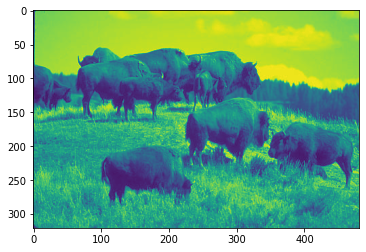

In [28]:
# the defulat pseudocolor is called viridis
# img = mpimg.imread('Data/buffalo.png') # uncomment if you use your local drive
img = mpimg.imread('gdrive/My Drive/Didattica/Classroom/Neural Networks 2022-2023/buffalo.png')  #Comment this line if you use your local drive
imgplot = plt.imshow(img)

It's helpful to have an idea of what value a color represents. We can do that by adding a color bar to the figure.

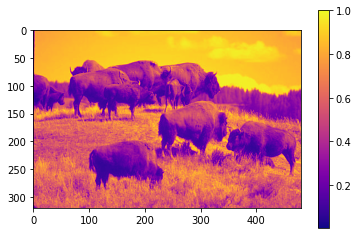

In [29]:
imgplot = plt.imshow(img, cmap='plasma')
plt.colorbar()

If we transpose a matrix representing an image, we obtain a rotation of that image.

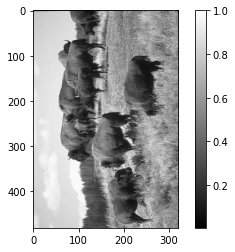

In [30]:
imgT = img.T
plt.imshow(imgT,cmap='gray')
plt.colorbar()

### 4. Tensors <a name="ten" />

#### 4.1. Definition of tensors <a name="tdef" />

**Tensors** give us a generic way of describing `ndarray`s with an arbitrary number of axes. Tensors are denoted with capital letters of a special font face
(e.g., $\mathsf{X}$, $\mathsf{Y}$, and $\mathsf{Z}$) and their indexing mechanism (e.g., $x_{ijk}$ and $[\mathsf{X}]_{1, 2i-1, 3}$) is similar to that of matrices.

Tensors will become more important when we start working with color images, which arrive as `ndarray`s with 3 axes corresponding to the height, width, and a *channel* axis for stacking the color channels (red, green, and blue). For now, we will skip over higher order tensors and focus on the basics.

In [31]:
X = np.arange(24).reshape(2, 3, 4)
X

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]],

       [[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]])

#### 4.2. Manipulation of multidimensional signals with tensors <a name="st" />

In [32]:
# load a color image
# imgc = mpimg.imread('Data/baboon.png') # uncomment if you use your local drive
imgc = mpimg.imread('gdrive/My Drive/Didattica/Classroom/Neural Networks 2022-2023/baboon.png')  #Comment this line if you use your local drive
print(imgc)

[[[0.6431373  0.5882353  0.2784314 ]
  [0.24705882 0.22352941 0.12156863]
  [0.29411766 0.16862746 0.03921569]
  ...
  [0.45882353 0.46666667 0.26666668]
  [0.5529412  0.6666667  0.39607844]
  [0.7019608  0.7372549  0.4627451 ]]

 [[0.47058824 0.49019608 0.24313726]
  [0.5294118  0.38039216 0.12941177]
  [0.21568628 0.13725491 0.09019608]
  ...
  [0.47843137 0.54901963 0.38431373]
  [0.53333336 0.62352943 0.5019608 ]
  [0.47058824 0.5411765  0.2901961 ]]

 [[0.3882353  0.2901961  0.12156863]
  [0.5176471  0.4627451  0.18039216]
  [0.23529412 0.16078432 0.14117648]
  ...
  [0.4627451  0.3647059  0.3529412 ]
  [0.34117648 0.35686275 0.3019608 ]
  [0.3764706  0.3137255  0.19215687]]

 ...

 [[0.4745098  0.5803922  0.60784316]
  [0.48235294 0.6117647  0.5882353 ]
  [0.4862745  0.5882353  0.54509807]
  ...
  [0.43137255 0.28627452 0.23529412]
  [0.3529412  0.3647059  0.27450982]
  [0.31764707 0.3137255  0.23529412]]

 [[0.49411765 0.6627451  0.65882355]
  [0.45882353 0.5921569  0.5921569 ]


In [33]:
# tensor dimension
imgc.shape

(512, 512, 3)

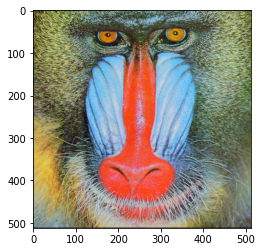

In [34]:
imgcplot = plt.imshow(imgc)

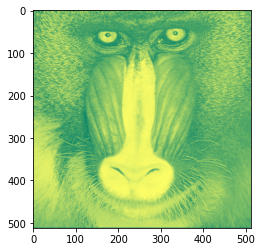

In [35]:
# we select only the first channel (R) of the image, thus turning to manage a black & white color
lum_img = imgc[:, :, 0]
plt.imshow(lum_img, cmap='summer')

### 5. Basic Operations <a name="op" />

#### 5.1. Elementwise operations <a name="ewo" />

**Addition**: adding two tensors (with generic dimensions) of the same shape performs elementwise addition over these two tensors.

In [36]:
# Import Numpy library
import numpy as np

In [37]:
A = np.random.randint(0,50,20)
print(A)

[ 4 36 26 38  6 44 43 24 25 26 48 24 27 49 24 26 10  5 40 37]


In [38]:
A = A.reshape(5,4)
print(A)

[[ 4 36 26 38]
 [ 6 44 43 24]
 [25 26 48 24]
 [27 49 24 26]
 [10  5 40 37]]


In [39]:
B = np.arange(20).reshape(5,4)
print(B)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]
 [16 17 18 19]]


In [40]:
# addition of matrices
C = A + B
print(C)

[[ 4 37 28 41]
 [10 49 49 31]
 [33 35 58 35]
 [39 62 38 41]
 [26 22 58 56]]


**Elementwise multiplication** of two matrices is called their *Hadamard product* (math notation $\odot$).
Consider matrix $\mathbf{B} \in \mathbb{R}^{N \times M}$ whose element of row $i$ and column $j$ is $b_{ij}$. The Hadamard product of matrices $\mathbf{A}$ and $\mathbf{B}$

$$
\mathbf{A} \odot \mathbf{B} =
\begin{bmatrix}
    a_{11}  b_{11} & a_{12}  b_{12} & \dots  & a_{1n}  b_{1n} \\
    a_{21}  b_{21} & a_{22}  b_{22} & \dots  & a_{2n}  b_{2n} \\
    \vdots & \vdots & \ddots & \vdots \\
    a_{m1}  b_{m1} & a_{m2}  b_{m2} & \dots  & a_{mn}  b_{mn}
\end{bmatrix}.
$$

In [41]:
# elementwise multiplication
C = A * B
print(C)

[[  0  36  52 114]
 [ 24 220 258 168]
 [200 234 480 264]
 [324 637 336 390]
 [160  85 720 703]]


In [42]:
# elementwise operations with tensors
a = 2
X = np.arange(24).reshape(2, 3, 4)
a + X, (a * X).shape

(array([[[ 2,  3,  4,  5],
         [ 6,  7,  8,  9],
         [10, 11, 12, 13]],
 
        [[14, 15, 16, 17],
         [18, 19, 20, 21],
         [22, 23, 24, 25]]]), (2, 3, 4))

#### 5.2. Dot product <a name="dot" />

Besides elementwise operations, one of the most fundamental operations is the **dot product**. Given two vectors $\mathbf{x}, \mathbf{y} \in \mathbb{R}^N$, their *dot product* $\mathbf{x}^\top \mathbf{y}$ (or $\langle \mathbf{x}, \mathbf{y}  \rangle$) is a sum over the products of the elements at the same position: $\mathbf{x}^\top \mathbf{y} = \sum_{i=1}^{N} x_i y_i$.

In [43]:
x = np.arange(4)
y = np.ones(4)
x, y, np.dot(x, y)

(array([0, 1, 2, 3]), array([1., 1., 1., 1.]), 6.0)

In [44]:
# equivalently we have
np.sum(x * y)

6.0

We can also calculate *matrix-vector products*. Let us consider a matrix $\mathbf{A} \in \mathbb{R}^{M \times N}$ and a vector $\mathbf{x} \in \mathbb{R}^N$. The matrix-vector product $\mathbf{A}\mathbf{x}$ is simply a column vector of length $M$, whose $i^\mathrm{th}$ element is the dot product $\mathbf{a}^\top_i \mathbf{x}$:

$$
\mathbf{A}\mathbf{x}
= \begin{bmatrix}
\mathbf{a}^\top_{1} \\
\mathbf{a}^\top_{2} \\
\vdots \\
\mathbf{a}^\top_M \\
\end{bmatrix}\mathbf{x}
= \begin{bmatrix}
 \mathbf{a}^\top_{1} \mathbf{x}  \\
 \mathbf{a}^\top_{2} \mathbf{x} \\
\vdots\\
 \mathbf{a}^\top_{M} \mathbf{x}\\
\end{bmatrix}.
$$

We can think of multiplication by a matrix $\mathbf{A}\in \mathbb{R}^{M \times N}$ as a transformation that projects vectors from $\mathbb{R}^{N}$ to $\mathbb{R}^{M}$. These transformations turn out to be remarkably useful.
For example, we can represent *rotations* as multiplications by a square matrix.

It is worth noting that the column dimension of `A` (its length along axis $1$)
must be the same as the dimension of `x` (its length).

In [45]:
A.shape, x.shape

((5, 4), (4,))

In [46]:
np.dot(A, x)

array([202, 202, 194, 175, 196])

The *matrix-matrix multiplication* is now straightforward. Let us consider two matrices $\mathbf{A} \in \mathbb{R}^{N \times K}$ and $\mathbf{B} \in \mathbb{R}^{K \times M}$:

$$\mathbf{A}=\begin{bmatrix}
 a_{11} & a_{12} & \cdots & a_{1k} \\
 a_{21} & a_{22} & \cdots & a_{2k} \\
\vdots & \vdots & \ddots & \vdots \\
 a_{n1} & a_{n2} & \cdots & a_{nk} \\
\end{bmatrix},\quad
\mathbf{B}=\begin{bmatrix}
 b_{11} & b_{12} & \cdots & b_{1m} \\
 b_{21} & b_{22} & \cdots & b_{2m} \\
\vdots & \vdots & \ddots & \vdots \\
 b_{k1} & b_{k2} & \cdots & b_{km} \\
\end{bmatrix}.$$

We can think of the matrix-matrix multiplication $\mathbf{AB}$ as a generalization of the matrix-vector product. It should not be confused with the Hadamard product.

In [47]:
# we consider the dot product between A[5x4] and B[4x3]
B = np.ones(shape=(4, 3))
np.dot(A, B)

array([[104., 104., 104.],
       [117., 117., 117.],
       [123., 123., 123.],
       [126., 126., 126.],
       [ 92.,  92.,  92.]])

#### 5.3. Norms <a name="nor" />

**Norms** are an important operator to measure a *metric space*, i.e., to tell us how *big* a vector (or a matrix) is.

In machine learning, we work more often with the squared $\ell_2$ norm (or **Euclidean norm**), which is the square root of the sum of the squares of the vector elements:

$$\|\mathbf{x}\|_2 = \sqrt{\sum_{i=1}^N \|x_i\|^2},$$

In Python, we can calculate the $\ell_2$ norm of a vector by calling `linalg.norm`.

In [48]:
u = np.array([3, -4])
np.linalg.norm(u)

5.0

In [49]:
# generate a vector
a = np.arange(9) - 4
print(a)
# generate a matrix
B = a.reshape((3, 3))
print(B)

[-4 -3 -2 -1  0  1  2  3  4]
[[-4 -3 -2]
 [-1  0  1]
 [ 2  3  4]]


In [50]:
# l2-norm of a vector
print(np.linalg.norm(a))

# l2-norm of a matrix
print(np.linalg.norm(B))

7.745966692414834
7.745966692414834


One of the other norm that can be frequently encountered in machine learning is the $\ell_1$ *norm*, which is expressed as the sum of the absolute values of the vector elements:

$$\|\mathbf{x}\|_1 = \sum_{i=1}^N \left|x_i \right|.$$

As compared with the $\ell_2$ norm, it is less influenced by *outliers*. To calculate the $\ell_1$ norm in Python, we compose the absolute value function with a sum over the elements.

In [51]:
a

array([-4, -3, -2, -1,  0,  1,  2,  3,  4])

In [52]:
np.abs(a).sum()

20

In [53]:
#l1 norm of a vector
print(np.linalg.norm(a, 1))

#l1 norm of a matrix
print(np.linalg.norm(B, 1))

20.0
7.0


Other examples of norms are the following ones:

In [54]:
# Frobenius norm of a matrix
np.linalg.norm(B, 'fro')

7.745966692414834

In [55]:
# inf norm of x is equivalent to equivalent to max(sum(abs(x), axis=1))
# infinite norm of a vector
print(np.linalg.norm(a, np.inf))

#infinite norm of a matrix
print(np.linalg.norm(B, np.inf))

4.0
9.0


In [56]:
# -inf norm of x is quivalent to min(sum(abs(x), axis=1))
# -inf norm of a vector
print(np.linalg.norm(a, -np.inf))
# -inf norm of a matrix
print(np.linalg.norm(B, -np.inf))

0.0
2.0


In [57]:
# l(-1) norm of x is equivalent to min(sum(abs(x), axis=1))
# l(-1) norm of a matrix
print(np.linalg.norm(B, -1))

6.0


In [58]:
# l(-2) norm of x is equivalent to finding the smallest singular value
# l(-2) norm of a matrix
print(np.linalg.norm(B, -2))

1.857033188519056e-16


### 6. References <a name="ref" />
[1] A. Zhang, Z. C. Lipton, M. Li, and A. J. Smola, Dive into deep learning, 0.7.1 ed., 2020.